# Homework 2. GDP 와 삶의 만족도 데이터셋을 활용해 1차 선형 함수 모델 학습하기
### 과목코드: [2150085101]
### 팀명: [20202995 장진영]
### 팀장: [20201571 강현준]
### 팀원: [20201601 이시호]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum|


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

/bin/bash: -c: line 2: syntax error: unexpected end of file


#### 설명. 아래의 예제는 1주차에 학습한 국가별 1인 GDP 에 따른 삶의 만족도를 1차 선형 함수로 모델링한 결과이다.

In [3]:
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

np.random.seed(42)  # 난수 생성기의 초기값 설정 (재현성 보장)

plt.rc("axes", unicode_minus=False)


def prepare_country_stats(oecd_bli, gdp_per_capita, remove_indices = [0, 1, 6, 8, 33, 34, 35], scale=1e-5):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    keep_indices = list(set(range(36)) - set(remove_indices))

    country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

    country_stats["GDP per capita"] *= scale
    return country_stats

In [4]:
## 데이터 적재
oecd_bli = pd.read_csv("/content/drive/MyDrive/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("/content/drive/MyDrive/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [5]:
## 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

#### 아래의 그림의 1인당 GDP (100K $) 에 대한 삶의 만족도 를 시각화한 결과이다.

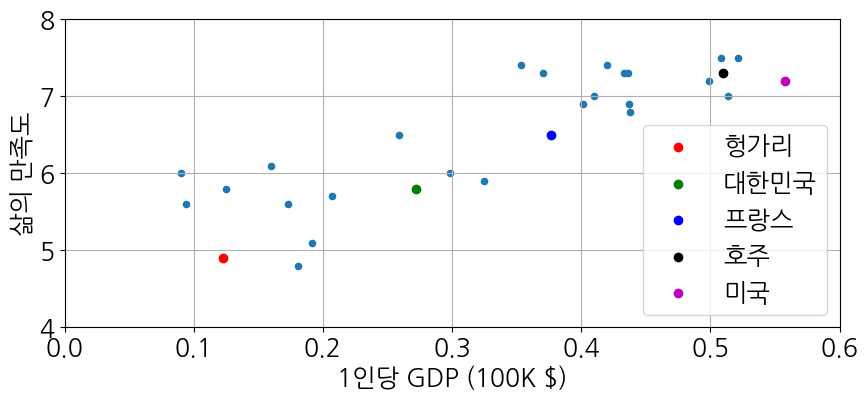

In [6]:
## 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(10, 4))
plt.scatter(country_stats['GDP per capita']['Hungary'],         country_stats["Life satisfaction"]['Hungary'],          c='r', label='헝가리')
plt.scatter(country_stats['GDP per capita']['Korea'],           country_stats["Life satisfaction"]['Korea'],            c='g', label='대한민국')
plt.scatter(country_stats['GDP per capita']['France'],          country_stats["Life satisfaction"]['France'],           c='b', label='프랑스')
plt.scatter(country_stats['GDP per capita']['Australia'],       country_stats["Life satisfaction"]['Australia'],        c='k', label='호주')
plt.scatter(country_stats['GDP per capita']['United States'],   country_stats["Life satisfaction"]['United States'],    c='m', label='미국')
plt.ylabel('삶의 만족도')
plt.xlabel('1인당 GDP (100K $)')
plt.ylim([4, 8])
plt.xlim([0, 0.6])
plt.grid()
plt.legend()
plt.show()


#### 이를 Linear Regression 모델을 이용하여 학습하면 아래와 같은 함수를 얻을 수 있다.

#### 삶의_만족도 = weight * 1인당_GDP + bias

In [7]:
## 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

## 모델 훈련
model.fit(X, Y)

weight = model.coef_[0, 0]  # 학습된 가중치 (weight)
bias = model.intercept_[0]  # 학습된 편향 (bias)

print(f'[학습된 모델] 삶의_만족도 = {weight:.2e} X 1인당_GDP + {bias:.2f}')

[학습된 모델] 삶의_만족도 = 4.91e+00 X 1인당_GDP + 4.85


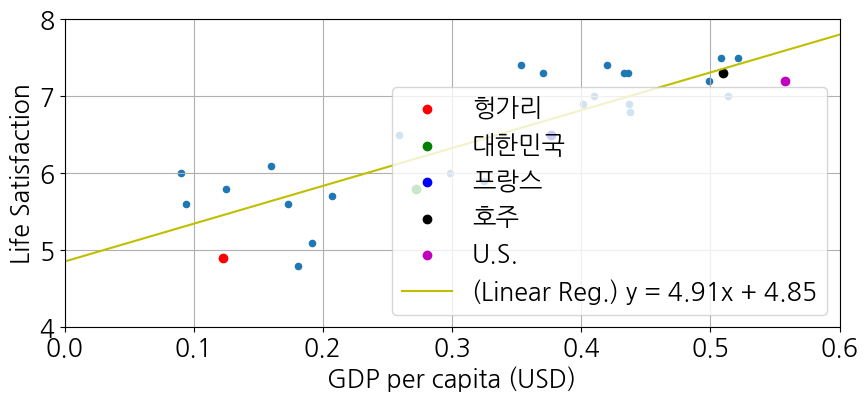

In [8]:
## 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(10, 4))

plt.scatter(country_stats['GDP per capita']['Hungary'],         country_stats["Life satisfaction"]['Hungary'],          c='r', label='헝가리')
plt.scatter(country_stats['GDP per capita']['Korea'],           country_stats["Life satisfaction"]['Korea'],            c='g', label='대한민국')
plt.scatter(country_stats['GDP per capita']['France'],          country_stats["Life satisfaction"]['France'],           c='b', label='프랑스')
plt.scatter(country_stats['GDP per capita']['Australia'],       country_stats["Life satisfaction"]['Australia'],        c='k', label='호주')
plt.scatter(country_stats['GDP per capita']['United States'],   country_stats["Life satisfaction"]['United States'],    c='m', label='U.S.')

plt.plot(np.linspace(0, 0.6),                                 weight*np.linspace(0, 0.6) + bias,                    'y',    label=rf'(Linear Reg.) y = {weight:.2f}x + {bias:.2f}')

plt.ylabel('Life Satisfaction')
plt.xlabel('GDP per capita (USD)')
plt.ylim([4, 8])
plt.xlim([0, 0.6])
plt.grid()
plt.legend()
plt.show()


#### 문제. 아래의 `코드`를 완성하고, 그에 대한 `분석`을 작성하시오.

1. (코드) 경사 하강법을 수행하기 위해, w 와 b 의 gradient 를 구하는 함수를 작성하시오.
   - (분석) 경사 하강법에 대해 설명하고, w 와 b 에 gradient 를 계산하시오.

In [9]:
w = 1
b = 0

# 기울기 계산
w_gradient = 2 * X * ((w * X + b - Y))
b_gradient = 2 *((w * X + b) - Y)
for i in range (0,29):
    print("w[",i,"],b[",i,"]",w_gradient[i],b_gradient[i])

w[ 0 ],b[ 0 ] [-1.07019139] [-11.81890172]
w[ 1 ],b[ 1 ] [-1.03917287] [-11.01125256]
w[ 2 ],b[ 2 ] [-1.16954661] [-9.55520212]
w[ 3 ],b[ 3 ] [-1.41823207] [-11.35009332]
w[ 4 ],b[ 4 ] [-1.89984467] [-11.88016528]
w[ 5 ],b[ 5 ] [-1.87648973] [-10.85423834]
w[ 6 ],b[ 6 ] [-1.66890795] [-9.23871424]
w[ 7 ],b[ 7 ] [-1.87727533] [-9.81756816]
w[ 8 ],b[ 8 ] [-2.27753579] [-10.98535036]
w[ 9 ],b[ 9 ] [-3.22861697] [-12.48270558]
w[ 10 ],b[ 10 ] [-3.0067271] [-11.05609606]
w[ 11 ],b[ 11 ] [-3.40558719] [-11.40266838]
w[ 12 ],b[ 12 ] [-3.62223218] [-11.1502891]
w[ 13 ],b[ 13 ] [-4.98098345] [-14.09313328]
w[ 14 ],b[ 14 ] [-5.1340893] [-13.85910218]
w[ 15 ],b[ 15 ] [-4.61386956] [-12.24649988]
w[ 16 ],b[ 16 ] [-5.21300683] [-12.99786736]
w[ 17 ],b[ 17 ] [-5.40336876] [-13.18006978]
w[ 18 ],b[ 18 ] [-5.85978709] [-13.96052024]
w[ 19 ],b[ 19 ] [-5.95093454] [-13.73336078]
w[ 20 ],b[ 20 ] [-5.98580846] [-13.7279377]
w[ 21 ],b[ 21 ] [-5.6515581] [-12.92551938]
w[ 22 ],b[ 22 ] [-5.56963894] [-12.724


경사하강법 : 비용 함수의 값이 낮아지는 방향으로 각 독립변수들의 값을 변형시키면서 함수가 최솟값을 갖도록 하는 탐색 방법</br>

Loss function은 MSE를 사용하였으며 w,b의 gradient 계산 식은 아래와 같다.</br>
MSE = $((wX+b)-y)^2$ </br>
w_gradient는 Loss 함수를 w에 대해 미분한값 이므로 $2X(wX+b-y)$ <br>
b_gradient는 Loss 함수를 b에 대해 미분한값 이므로 $2(wX+b-y)$

2. (코드) 사용되는 변수들을 초기화 (initialization) 하시오.
   - (분석) 사용되는 변수들에 대해 설명하시오.

In [10]:
w = 1  # 초기 가중치
b = 0  # 초기 절편
learning_rate = 0.01  #  학습률
n_epochs = 100  # Epoch 횟수

w : 모델이 입력 데이터에 곱하는 가중치 값. 경사 하강법을 통해 이 값을 점차적으로 업데이트하여 최적의 값으로 조정

b : 예측값을 조정하기 위해 더해지는 상수 항으로, 모델이 학습을 통해 최적의 절편을 찾을 수 있도록 점차적으로 업데이트

learning_rate : 가중치와 절편을 얼마나 빠르게 업데이트할지 결정하는 값.

epochs : 모든 데이터셋을 학습하는 횟수이며 한 에폭이 완료되면 모델이 데이터셋의 모든 샘플에 대해 한 번씩 업데이트된 상태


3. (코드) 확률적 경사 하강법 (Stocastic Gradient Descent Method) 를 이용하여, 1차원 선형 함수를 학습하시오.
   - (분석) 상세히 주석을 작성하시오.

In [11]:
lst_w = [] # 가중치 저장 리스트
lst_b = [] # 상수항(절편) 저장 리스트
lst_loss = [] # loss 저장 리스트

# 초기 파라미터값 저장
lst_w.append(w)
lst_b.append(b)

#인덱스를 리스트로 생성 (0부터 X-1 길이의 인덱스)
random_index = list(range(len(X)))

#초기 에폭 정보 출력
print(f"Epoch = 0")
print(f"w = {w:.4f}, b = {b:.4f}")

# Stochastic Gradient Descent (SGD) 수행
for epoch in range(n_epochs):  # 각 epoch 반복
    # 데이터 인덱스를 무작위로 섞음 (확률적 경사 하강법)
    np.random.shuffle(random_index)
    for i in random_index:  # 각 데이터 포인트에 대해 반복

        # 데이터 불러오기
        x = X[i][0]
        y = Y[i][0]

        #예측값 계산
        y_pred = w * x + b

        # Loss 계산
        loss = (y - y_pred) ** 2

        # Gradient 계산
        dw = -2 * x * (y - y_pred)
        db = -2 * (y - y_pred)

        # 파라미터 업데이트
        w -= learning_rate * dw
        b -= learning_rate * db

        # 파라메터 누적하기
        lst_w.append(w)
        lst_b.append(b)
        lst_loss.append(loss)

    print(f"Epoch = {epoch+1}")
    print(f"w = {w:.4f}, b = {b:.4f}")

Epoch = 0
w = 1.0000, b = 0.0000
Epoch = 1
w = 1.9285, b = 2.6467
Epoch = 2
w = 2.4260, b = 4.0131
Epoch = 3
w = 2.6900, b = 4.7392
Epoch = 4
w = 2.8383, b = 5.1090
Epoch = 5
w = 2.9258, b = 5.2966
Epoch = 6
w = 2.9828, b = 5.3963
Epoch = 7
w = 3.0204, b = 5.4392
Epoch = 8
w = 3.0469, b = 5.4507
Epoch = 9
w = 3.0723, b = 5.4591
Epoch = 10
w = 3.0967, b = 5.4664
Epoch = 11
w = 3.1140, b = 5.4529
Epoch = 12
w = 3.1366, b = 5.4555
Epoch = 13
w = 3.1589, b = 5.4590
Epoch = 14
w = 3.1761, b = 5.4470
Epoch = 15
w = 3.1929, b = 5.4347
Epoch = 16
w = 3.2125, b = 5.4311
Epoch = 17
w = 3.2294, b = 5.4201
Epoch = 18
w = 3.2510, b = 5.4234
Epoch = 19
w = 3.2652, b = 5.4060
Epoch = 20
w = 3.2857, b = 5.4064
Epoch = 21
w = 3.3025, b = 5.3976
Epoch = 22
w = 3.3197, b = 5.3915
Epoch = 23
w = 3.3365, b = 5.3843
Epoch = 24
w = 3.3560, b = 5.3853
Epoch = 25
w = 3.3722, b = 5.3765
Epoch = 26
w = 3.3880, b = 5.3685
Epoch = 27
w = 3.4036, b = 5.3605
Epoch = 28
w = 3.4245, b = 5.3678
Epoch = 29
w = 3.4401, b

#### (수정하지 마시오.) 결과 출력

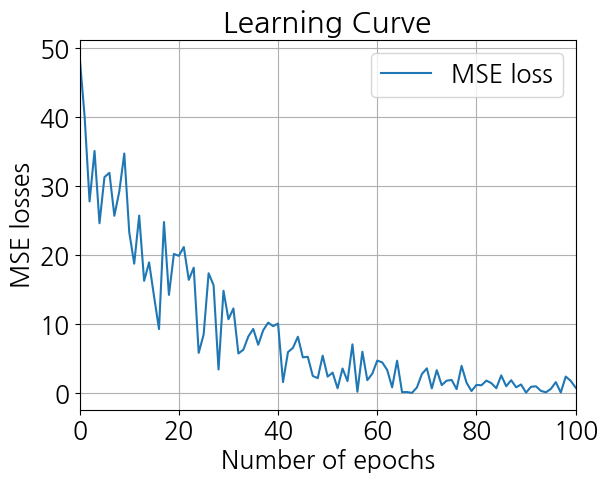

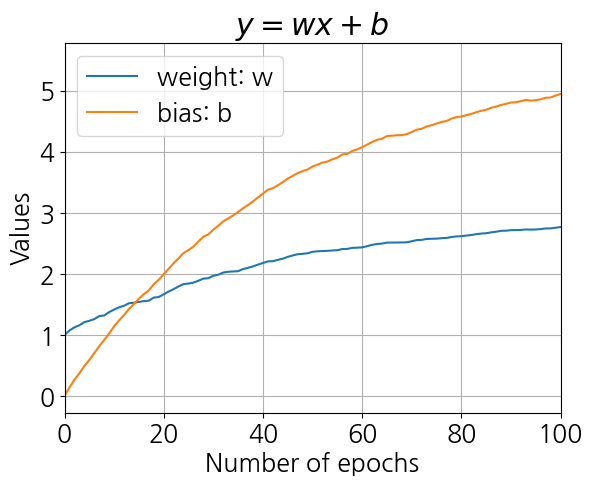

In [12]:
plt.plot(lst_loss, label='MSE loss')
plt.legend()
plt.grid()
plt.xlim([0, n_epochs])
plt.title('Learning Curve')
plt.xlabel('Number of epochs')
plt.ylabel('MSE losses')
plt.show()

plt.plot(lst_w, label='weight: w')
plt.plot(lst_b, label='bias: b')
plt.legend()
plt.grid()
plt.xlim([0, n_epochs])
plt.title('$y = wx + b$')
plt.xlabel('Number of epochs')
plt.ylabel('Values')
plt.show()


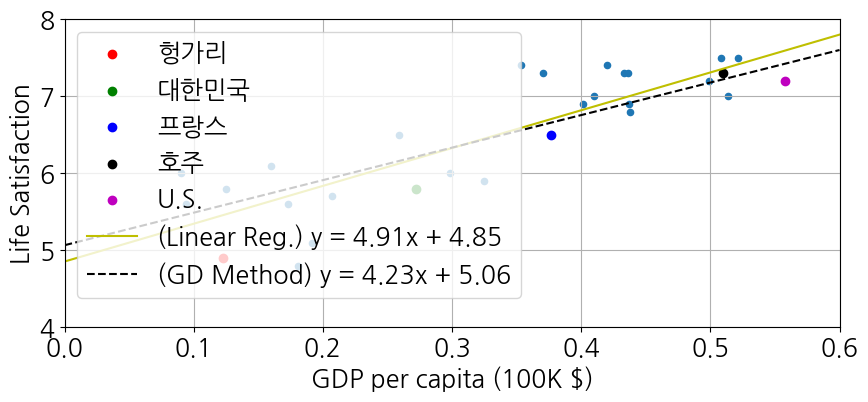

In [13]:
## 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(10, 4))

plt.scatter(country_stats['GDP per capita']['Hungary'],         country_stats["Life satisfaction"]['Hungary'],          c='r', label='헝가리')
plt.scatter(country_stats['GDP per capita']['Korea'],           country_stats["Life satisfaction"]['Korea'],            c='g', label='대한민국')
plt.scatter(country_stats['GDP per capita']['France'],          country_stats["Life satisfaction"]['France'],           c='b', label='프랑스')
plt.scatter(country_stats['GDP per capita']['Australia'],       country_stats["Life satisfaction"]['Australia'],        c='k', label='호주')
plt.scatter(country_stats['GDP per capita']['United States'],   country_stats["Life satisfaction"]['United States'],    c='m', label='U.S.')

plt.plot(np.linspace(0, 0.6),                                 weight*np.linspace(0, 0.6) + bias,                    'y',    label=rf'(Linear Reg.) y = {weight:.2f}x + {bias:.2f}')
plt.plot(np.linspace(0, 0.6),                                 w*np.linspace(0, 0.6) + b,                            'k--',  label=rf'(GD Method) y = {w:.2f}x + {b:.2f}')

plt.ylabel('Life Satisfaction')
plt.xlabel('GDP per capita (100K $)')
plt.ylim([4, 8])
plt.xlim([0, 0.6])
plt.grid()
plt.legend()
plt.show()


4. (코드) weight 와 bias 의 초기값, epoch 의 횟수, 그리고 학습률 (learning rate) 등을 변경해가며 위의 결과 출력을 수행하시오.
   - (분석) weight 와 bias 의 초기값, epoch 의 횟수, 그리고 학습률 (learning rate) 등이 달라짐에 따라, 어떤 변화가 있는 관측하고 분석하시오.

# 1. Learning Rate 변경




Learning Rate의 값이 결과에 미치는 영향을 확인하기 위해 값을 [0.001, 0.005, 0.01, 0.05, 0.1, 0.7] 로 설정한 후 결과를 plot하였다.

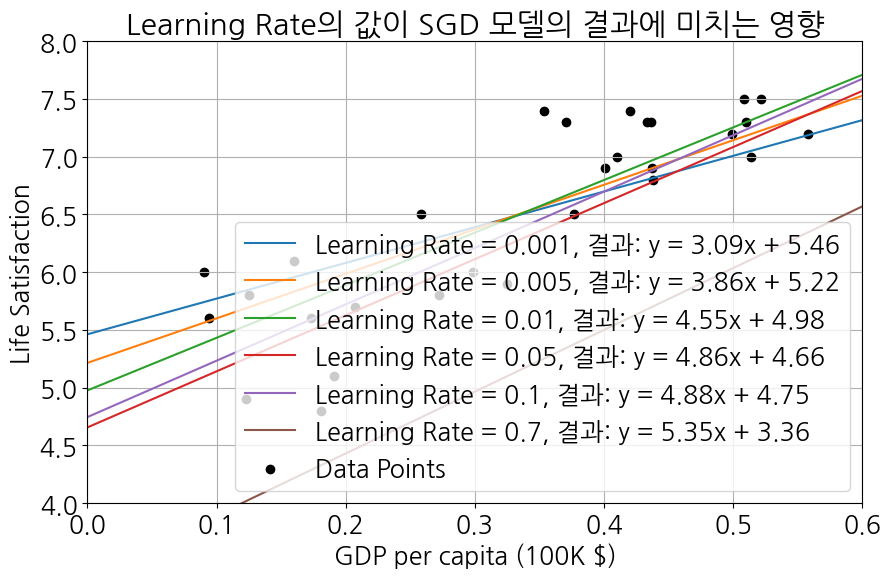

In [14]:
b = 0  # 초기 Bias
w = 1  # 초기 Weight
n_epochs = 100  # Epoch 횟수
lst_loss = []
np.random.seed(42)  # 난수 생성기의 초기값 설정 (재현성 보장)

# Plot 생성
plt.figure(figsize=(10, 6))

# Learning Rate를 변경하면서 실험
for learning_rate in [0.001, 0.005, 0.01, 0.05, 0.1, 0.7]:

    # reset
    lst_w = []
    lst_b = []
    lst_loss = []

    # 초기값 삽입
    lst_w.append(w)
    lst_b.append(b)

    # Stochastic Gradient Descent (SGD) 수행
    random_index = list(range(len(X)))
    for epoch in range(n_epochs):
        np.random.shuffle(random_index)
        for i in random_index:
            # 데이터 불러오기
            x = X[i][0]
            y = Y[i][0]

            y_pred = w * x + b

            # 손실(loss) 계산
            loss = (y - y_pred) ** 2

            # Gradient 계산
            dw = -2 * x * (y - y_pred)
            db = -2 * (y - y_pred)

            # 파라미터 업데이트 및 lst 추가
            w -= learning_rate * dw
            b -= learning_rate * db

            lst_w.append(w)
            lst_b.append(b)
            lst_loss.append(loss)

    # 최종 모델 그래프 추가
    x_vals = np.linspace(0, 0.6)  # x 범위
    y_vals = w * x_vals + b
    plt.plot(x_vals, y_vals, label=f'Learning Rate = {learning_rate}, 결과: y = {w:.2f}x + {b:.2f}')

# 원본 데이터 산점도
plt.scatter(X, Y, color='black', label="Data Points")

# 그래프 설정
plt.xlabel("GDP per capita (100K $)")
plt.ylabel("Life Satisfaction")
plt.xlim([0, 0.6])
plt.ylim([4, 8])
plt.title("Learning Rate의 값이 SGD 모델의 결과에 미치는 영향")
plt.legend()
plt.grid()
plt.show()

실험 결과 Learning Rate가 비교적 낮은 [0.001, 0.005] 일 때 학습 결과 기울기의 변동 폭이 컸으며, Learning Rate가 0.05 이상일 때는 비슷한 기울기를 가진 결과를 얻을 수 있었다.
이를 통해 Learning Rate가 너무 낮을 경우, 주어진 Epoch 동안 찾고자 하는 최적의 기울기에 도달하지 못하여 기울기가 작게 나타날 수 있다는 점을 유추할 수 있다.
이와 반대로 Learning Rate가 0.7로 너무 높은 경우에는 Gradient Descent 과정에서 기울기 방향으로 이동할 때
큰 폭으로 이동하게 되므로 값이 발산하거나 잘못된 결과를 도출할 수 있다.

# 2. Epoch 변화

Epoch의 변화가 결과에 미치는 영향을 확인하기 위해 값을 50부터 500까지 50씩 증가시키며 실험을 진행하였다.

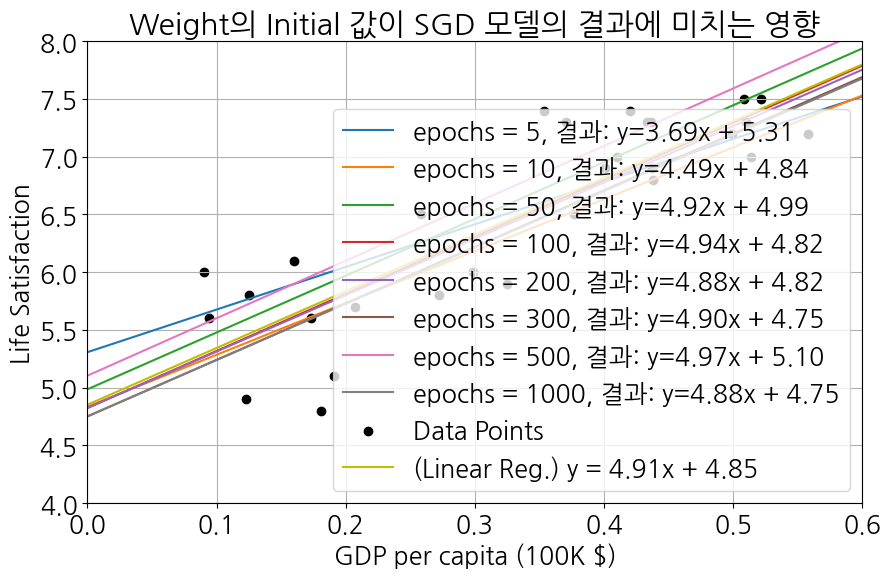

In [15]:
w = 1  # 초기 가중치
b = 0  # 초기 절편
learning_rate = 0.1 # 초기 학습률
lst_loss = []

# Plot 생성
plt.figure(figsize=(10, 6))

# epoch를 50부터 500까지 50씩 증가시키면서 실험
for n_epochs in [5,10,50,100,200,300,500,1000]:
    # 초기 Weight 설정

    # reset
    lst_w = []
    lst_b = []
    lst_loss = []

    # 초기값 삽입
    lst_w.append(w)
    lst_b.append(b)

    # Stochastic Gradient Descent (SGD) 수행
    random_index = list(range(len(X)))
    for epoch in range(n_epochs):
        np.random.shuffle(random_index)
        for i in random_index:
            # 데이터 불러오기
            x = X[i][0]
            y = Y[i][0]

            y_pred = w * x + b

            # 손실(loss) 계산
            loss = (y - y_pred) ** 2

            # Gradient 계산
            dw = -2 * x * (y - y_pred)
            db = -2 * (y - y_pred)

            # 파라미터 업데이트 및 lst 추가
            w -= learning_rate * dw
            b -= learning_rate * db

            lst_w.append(w)
            lst_b.append(b)
            lst_loss.append(loss)

    # 최종 모델 그래프 추가
    x_vals = np.linspace(0, 0.6)  # x 범위
    y_vals = w * x_vals + b
    plt.plot(x_vals, y_vals, label=f'epochs = {n_epochs}, 결과: y={w:.2f}x + {b:.2f}')

# 원본 데이터 산점도
plt.scatter(X, Y, color='black', label="Data Points")

# 그래프 설정
plt.plot(np.linspace(0, 0.6),                                 weight*np.linspace(0, 0.6) + bias,                    'y',    label=rf'(Linear Reg.) y = {weight:.2f}x + {bias:.2f}')
plt.xlabel("GDP per capita (100K $)")
plt.ylabel("Life Satisfaction")
plt.xlim([0, 0.6])
plt.ylim([4, 8])
plt.title("Weight의 Initial 값이 SGD 모델의 결과에 미치는 영향")
plt.legend()
plt.grid()
plt.show()

실험결과 학습횟수가 5,10일때에는 충분한 양의 학습을 하지 않았기 때문에 그래프의 기울기가 작은 것을 확인 할 수 있다. 또한, 학습횟수가 50이상일때에는 충분히 양의 학습을 하였기 때문에 그래프의 모습이 선형모델의 그래프와 유사함을 알 수 있다.

# 3. Weight 초기값 설정

초기 Weight의 값이 결과에 미치는 영향을 확인하기 위해 초기값을 1에서10까지 점차 증가시켜 결과를 plot하였다.


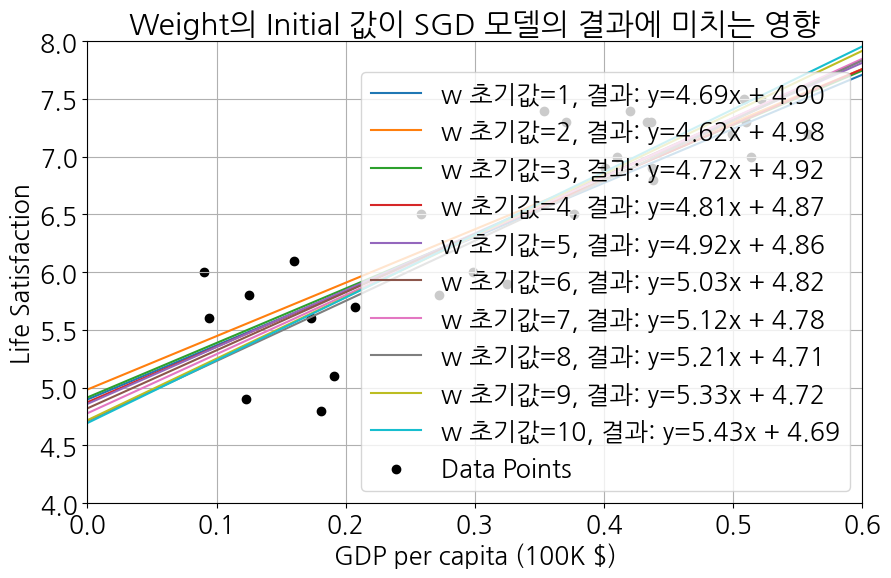

In [16]:
b = 0  # 초기 절편
learning_rate = 0.02 # Learning Rate
n_epochs = 100  # Epoch 횟수
lst_loss = []

# Plot 생성
plt.figure(figsize=(10, 6))

# Weight를 1부터 10까지 변경하면서 실험
for initial_w in range(1,11):
    # 초기 Weight 설정
    w = initial_w

    # reset
    lst_w = []
    lst_b = []
    lst_loss = []

    # 초기값 삽입
    lst_w.append(w)
    lst_b.append(b)

    # Stochastic Gradient Descent (SGD) 수행
    random_index = list(range(len(X)))
    for epoch in range(n_epochs):
        np.random.shuffle(random_index)
        for i in random_index:
            # 데이터 불러오기
            x = X[i][0]
            y = Y[i][0]

            y_pred = w * x + b

            # 손실(loss) 계산
            loss = (y - y_pred) ** 2

            # Gradient 계산
            dw = -2 * x * (y - y_pred)
            db = -2 * (y - y_pred)

            # 파라미터 업데이트 및 lst 추가
            w -= learning_rate * dw
            b -= learning_rate * db

            lst_w.append(w)
            lst_b.append(b)
            lst_loss.append(loss)

    # 최종 모델 그래프 추가
    x_vals = np.linspace(0, 0.6)  # x 범위
    y_vals = w * x_vals + b
    plt.plot(x_vals, y_vals, label=f'w 초기값={initial_w}, 결과: y={w:.2f}x + {b:.2f}')

# 원본 데이터 산점도
plt.scatter(X, Y, color='black', label="Data Points")

# 그래프 설정
plt.xlabel("GDP per capita (100K $)")
plt.ylabel("Life Satisfaction")
plt.xlim([0, 0.6])
plt.ylim([4, 8])
plt.title("Weight의 Initial 값이 SGD 모델의 결과에 미치는 영향")
plt.legend()
plt.grid()
plt.show()

실험결과 Weight의 초기값은 결과에 큰 영향을 미치진 않는다. 그러나 같은 조건에서 Learning Rate를 변경한 결과 Weight의 초기값이 커질수록 결과값의 기울기가 더 커지는 경향이 있음. 그만큼 Bias가 낮아져 Data point가 있는 부분에는 비슷한 결과를 보여줌.
따라서 실험 전 적절한 Weight, Bias, Epoch를 찾고 그 다음 진행할 필요성을 느낌.

# Bias 초기값 설정

초기 Weight의 값이 결과에 미치는 영향을 확인하기 위해 초기값을 1에서10까지 점차 증가시켜 실험을 진행하였다.